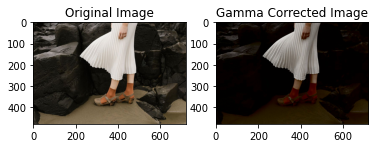

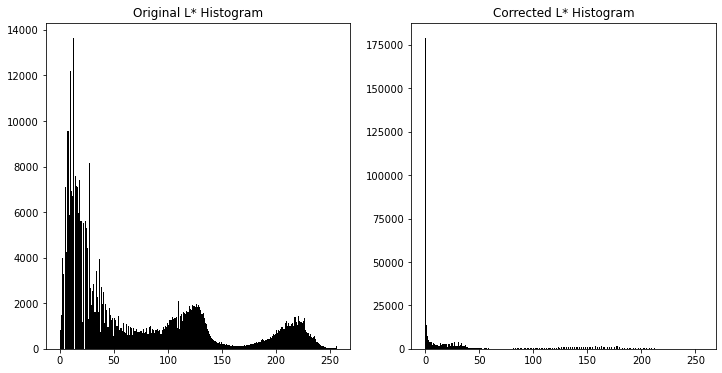

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image from the specified path
image = cv.imread('a1images/a1images/highlights_and_shadows.jpg')

# Convert the image from BGR (default in OpenCV) to L*a*b* color space
lab_image = cv.cvtColor(image, cv.COLOR_BGR2Lab)

# Split the L*a*b* image into L*, a*, and b* channels
L, a, b = cv.split(lab_image)

# Apply gamma correction to the L* channel to adjust brightness
gamma = 3  # Gamma value
L_float = L / 255.0  # Normalize L* to the range [0, 1]
L_corrected = np.power(L_float, gamma) * 255.0  # Apply gamma correction and rescale to [0, 255]
L_corrected = np.uint8(np.clip(L_corrected, 0, 255))  # Ensure values are in valid range for display

# Merge the gamma-corrected L* channel with the original a* and b* channels
lab_corrected = cv.merge([L_corrected, a, b])

# Convert the corrected L*a*b* image back to BGR color space for display
corrected_image = cv.cvtColor(lab_corrected, cv.COLOR_Lab2BGR)

# Display the original and gamma-corrected images side by side
plt.subplot(121), plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv.cvtColor(corrected_image, cv.COLOR_BGR2RGB)), plt.title('Gamma Corrected Image')
plt.show()

# Plot histograms of the original and gamma-corrected L* channels to visualize the effect of gamma correction
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.hist(L.flatten(), bins=256, range=(0, 256), color='black'), plt.title('Original L* Histogram')
plt.subplot(122), plt.hist(L_corrected.flatten(), bins=256, range=(0, 256), color='black'), plt.title('Corrected L* Histogram')
plt.show()
